In [80]:
import numpy.random as sim
import numpy as np
def arrondi(x):
    return int(x)+ (int(x*10)%10)/10
data = [arrondi(-10+2*sim.randn()) for i in range(100000)]
data

[-9.3,
 -6.8,
 -9.7,
 -9.4,
 -5.6,
 -13.0,
 -9.2,
 -13.4,
 -7.6,
 -6.4,
 -8.0,
 -7.1,
 -10.3,
 -14.0,
 -11.4,
 -9.0,
 -8.2,
 -10.8,
 -12.9,
 -9.2,
 -11.0,
 -8.1,
 -9.5,
 -8.0,
 -3.2,
 -8.4,
 -8.5,
 -10.0,
 -7.3,
 -6.8,
 -10.1,
 -8.8,
 -10.3,
 -7.4,
 -11.7,
 -9.3,
 -10.2,
 -7.8,
 -9.3,
 -9.4,
 -7.0,
 -9.3,
 -6.7,
 -9.7,
 -9.7,
 -10.6,
 -8.8,
 -10.0,
 -11.7,
 -10.2,
 -9.7,
 -8.2,
 -11.4,
 -11.8,
 -10.4,
 -6.2,
 -8.8,
 -7.6,
 -10.9,
 -5.7,
 -7.7,
 -7.8,
 -11.2,
 -9.7,
 -5.9,
 -7.4,
 -10.2,
 -8.2,
 -9.0,
 -9.8,
 -6.8,
 -9.7,
 -8.1,
 -8.4,
 -9.1,
 -11.1,
 -5.1,
 -6.6,
 -6.3,
 -12.3,
 -9.2,
 -7.9,
 -7.2,
 -6.9,
 -9.5,
 -10.6,
 -10.9,
 -7.5,
 -9.0,
 -8.1,
 -6.1,
 -9.4,
 -10.3,
 -11.1,
 -9.0,
 -7.8,
 -9.1,
 -9.8,
 -10.5,
 -8.3,
 -7.8,
 -9.4,
 -9.3,
 -13.7,
 -7.9,
 -9.5,
 -5.1,
 -7.0,
 -8.8,
 -9.2,
 -10.2,
 -8.3,
 -7.9,
 -6.5,
 -11.9,
 -11.9,
 -11.0,
 -8.2,
 -9.7,
 -11.2,
 -6.5,
 -7.7,
 -10.5,
 -6.2,
 -7.9,
 -9.1,
 -8.0,
 -7.6,
 -7.8,
 -6.9,
 -9.7,
 -12.0,
 -7.8,
 -9.8,
 -9.2,
 -10.9,
 -12.2,
 

In [81]:
def get_freq(data):
    sorted_data = sorted(data)
    freq = []
    x = []
    n = len(sorted_data)
    for i in range(len(sorted_data)):
        if i == 0:
            freq.append(1/n)
            x.append(sorted_data[i])
        elif sorted_data[i-1]!=sorted_data[i]:
            freq.append(freq[-1]+1/n)
            x.append(sorted_data[i])
        else:
            freq[-1] += 1/n
    return freq, x

In [103]:
def VaR2(data, alpha):
    sorted_data = sorted(data)
    freq = []
    x = []
    n = len(sorted_data)
    for i in range(len(sorted_data)):
        if i == 0:
            freq.append(1/n)
            x.append(sorted_data[i])
            if (freq[-1] >= 1-alpha) :
                return -sorted_data[i]
        elif sorted_data[i-1]!=sorted_data[i]:
            freq.append(freq[-1]+1/n)
            x.append(sorted_data[i])
            if (freq[-1] >= 1-alpha) :
                return -sorted_data[i]
        else:
            freq[-1] += 1/n
            if (freq[-1] >= 1-alpha) :
                return -sorted_data[i]
    return freq, x

In [90]:
def VaR(data, alpha):
    freq, x = get_freq(data)
    for i in range(len(freq)):
        if (freq[i] >= 1-alpha) :
            return -x[i]

In [95]:
VaR(data, 0.8)

10.7

In [96]:
def tVaR(data, alpha, precision):
    alphas = np.linspace(alpha,1-(1-alpha)/precision, precision)
    sum_VaR = 0
    for alpha_i in alphas:
        sum_VaR += VaR(data, alpha_i)
    
    sum_VaR = sum_VaR / precision

    return sum_VaR

In [100]:
def tVaR2(data, alpha, precision):
    alphas = np.linspace(alpha,1-(1-alpha)/precision, precision)
    sum_VaR = 0
    for alpha_i in alphas:
        sum_VaR += VaR2(data, alpha_i)
    
    sum_VaR = sum_VaR / precision

    return sum_VaR

In [109]:
tVaR(data,0.99,100)

14.470000000000004

In [110]:
tVaR2(data,0.99,100)

14.470000000000004

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Accord = pd.read_excel('AccordHotel.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
Axa = pd.read_excel('Axa.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
BNP = pd.read_excel('BNP.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
Casino = pd.read_excel('Casino.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
ENGI = pd.read_excel('ENGI.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
LVMH = pd.read_excel('LVMH.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
Orange = pd.read_excel('Orange.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
Peugeot = pd.read_excel('Peugeot.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
Renault = pd.read_excel('Renault.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
Total = pd.read_excel('Total.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
Veolia = pd.read_excel('Veolia.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])
Vivendi = pd.read_excel('Vivendi.xlsm', names = ['id', 'date', 'open', 'high', 'low', 'close', 'volume'])

datas = [Accord, Axa, BNP, Casino, ENGI, LVMH, Orange, Peugeot, Renault, Total, Veolia, Vivendi]

In [112]:
for i in range(len(datas)):
    datas[i]['R'] = np.nan
    for j in range(254):
        datas[i]['R'].iloc[j] = (datas[i]['low'].iloc[j+1] + datas[i]['high'].iloc[j+1])/(datas[i]['low'].iloc[j] + datas[i]['high'].iloc[j]) - 1

ER = [np.mean(datas[i]['R']) for i in range(len(datas))]
ER


C:\Users\user\AppData\Local\Temp\ipykernel_15456\2865213390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas[i]['R'].iloc[j] = (datas[i]['low'].iloc[j+1] + datas[i]['high'].iloc[j+1])/(datas[i]['low'].iloc[j] + datas[i]['high'].iloc[j]) - 1
C:\Users\user\AppData\Local\Temp\ipykernel_15456\2865213390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas[i]['R'].iloc[j] = (datas[i]['low'].iloc[j+1] + datas[i]['high'].iloc[j+1])/(datas[i]['low'].iloc[j] + datas[i]['high'].iloc[j]) - 1
C:\Users\user\AppData\Local\Temp\ipykernel_15456\2865213390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

[-0.0006401792778455088,
 -0.0010525263114721855,
 -0.001829743349972335,
 -0.0013104455101185235,
 -0.000492563944316347,
 0.00025878178177848724,
 -8.334380139173682e-05,
 0.00035640289946057446,
 -0.0017154854383169872,
 7.791569222361497e-06,
 -0.0006615667317761678,
 -0.00024007184962658568]

In [122]:
(1*datas[11]['R']).dropna().to_numpy().tolist()

[0.016915641476274335,
 0.010153380859797112,
 0.01283147989734812,
 0.027027027027026973,
 0.01624177631578938,
 -0.012340683795265983,
 -0.03277345350266292,
 0.013341804320203376,
 -0.0002089864158829613,
 -0.011078595317725815,
 -0.007820756711054866,
 -0.0002130379207496702,
 0.013637332196888785,
 0.0012612991381122374,
 -0.007348309888725479,
 -0.014593908629441543,
 0.0036488516849109143,
 -0.0021385799828915752,
 -0.0010715816545220358,
 0.009440034327397484,
 -0.00722635494155166,
 -0.012417041318775413,
 -0.03186646433990892,
 -0.0181370353784146,
 0.01847206385404787,
 -0.00850873264666363,
 -0.0257452574525745,
 0.0020862308762170656,
 -0.002081887578070818,
 0.008344923504867818,
 0.010804597701149499,
 -0.04503070275187626,
 0.001905215527506554,
 0.008557166627050083,
 -0.011784115012962504,
 -0.0054853326973526295,
 0.00959232613908867,
 -0.002375296912114022,
 0.009761904761904638,
 -0.0042442820089599875,
 -0.005919962112242438,
 -0.02382086707956166,
 -0.00219619326

In [140]:
L = np.array([1,2,5,6,8,9])
M = np.array([1,2,5,6,8,9])

str((M+L).tolist())

'[2, 4, 10, 12, 16, 18]'

In [135]:
print(1.05**(1/255))

1.000191352282648


In [154]:
winners = {}
for i in range(100000):
    opt_VaR = np.Inf
    ER_x = np.zeros(12)
    x = np.zeros(12)
    datas_x = np.zeros(len(datas[0]['R']))
    for j in range(11):
        x[j] = 2*np.random.randn()
        ER_x[j] = x[j]*ER[j]
        datas_x += (datas[j]['R']*x[j]).to_numpy()
    x[11] = 1 - np.sum(x)
    ER_x[11] = x[11]*ER[11]
    datas_x += (datas[11]['R']*x[11]).to_numpy()
    ER_x_val = ER_x.sum()
    VaR_x = VaR2(datas_x.tolist(), 0.95)
    #if (ER_x_val >= (1.05**(1/255)) - 1):
    if (VaR_x < opt_VaR):
        opt_x = x
        opt_ER = ER_x_val
        opt_VaR = VaR_x
    winners[str(x.tolist())] = {'VaR': VaR_x, 'ER': ER_x_val}
print(opt_x, ' - ', opt_ER, ' - ', opt_VaR)


[ 1.4247436   0.43661801  0.54871261 -0.11133026  1.29883796  0.19901883
 -1.70349292  2.20136542 -2.63908572 -0.53815708 -0.47620202  0.35897157]  -  0.0028605164914214877  -  0.0499297739924075


In [155]:
X = []
Y = []
for key in winners:
    X.append(winners[key]['VaR'])
    Y.append(winners[key]['ER'])

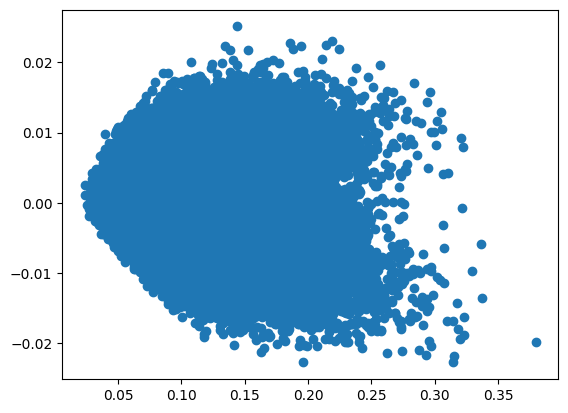

In [156]:
plt.scatter(X,Y)